In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
print(df_train.columns)

Index(['id', 'MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)',
       'NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Sex 0M1F', 'Mono CD64+MFI (cells/ul)', 'label'],
      dtype='object')


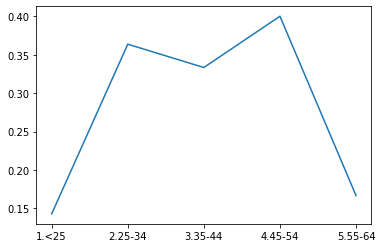

In [2]:
df_train.loc[(df_train.Age >= 65),  'AgeGroup'] = '6.>=65'
df_train.loc[(df_train.Age < 65),  'AgeGroup'] = '5.55-64'
df_train.loc[(df_train.Age < 55),  'AgeGroup'] = '4.45-54'
df_train.loc[(df_train.Age < 45),  'AgeGroup'] = '3.35-44'
df_train.loc[(df_train.Age < 35),  'AgeGroup'] = '2.25-34'
df_train.loc[(df_train.Age < 25),  'AgeGroup'] = '1.<25'
plt.plot(df_train.groupby("AgeGroup").agg({"label":"mean"}))


df_test.loc[(df_test.Age >= 65),  'AgeGroup'] = '6.>=65'
df_test.loc[(df_test.Age < 65),  'AgeGroup'] = '5.55-64'
df_test.loc[(df_test.Age < 55),  'AgeGroup'] = '4.45-54'
df_test.loc[(df_test.Age < 45),  'AgeGroup'] = '3.35-44'
df_test.loc[(df_test.Age < 35),  'AgeGroup'] = '2.25-34'
df_test.loc[(df_test.Age < 25),  'AgeGroup'] = '1.<25'

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

param_grid = {
    'classifier__max_depth': [3,5,7,9],
    'classifier__n_estimators': [50,100,200,500]
}




col_X = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)','CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)','NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)', 'Age',
       'Sex 0M1F', 'Mono CD64+MFI (cells/ul)']
num_X = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)',
       'Mono CD64+MFI (cells/ul)',"Age"
]
cat_X = [
       'Sex 0M1F'
]
col_Y =  ["label"]

log_trans_col = ['CD3+T (cells/ul)', 'CD8+T (cells/ul)', 'CD4+T (cells/ul)','NK (cells/ul)', 'CD19+ (cells/ul)', 'CD45+ (cells/ul)']


X=df_train[col_X]
Y=df_train[col_Y]

numpipline = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numpipline, num_X),
        ("log",FunctionTransformer(np.log1p),log_trans_col),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_X)
    ]
)

#xgb_classifier = xgb.XGBClassifier()
#svm_classifier = svm.SVC()
rf = RandomForestClassifier(random_state=0)
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", rf)]
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


search = GridSearchCV(pipe, param_grid, n_jobs=4)
search.fit(X_train, Y_train)
#pipe.fit(X_train ,y = Y_train)






c:\Users\tkyiu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MO '
                                                                          'HLADR+ '
                                                                          'MFI '
                                                                          '(cells/ul)',
                                                                          'Neu '
                              

In [4]:
print("model score: %.3f" % search.score(X_test, Y_test))

model score: 0.833


In [6]:
from datetime import datetime
str_time = datetime.now().strftime("%Y%m%d%H%M%S")

In [7]:
#y_prob = [p[1] for p in search.predict_proba(df_test[col_X])]
#y_res = pipe.predict(df_test[col_X])
#y_res = [0 if p < 0.6 else 1 for p in y_prob]
y_res = search.predict(df_test[col_X])
df_submission = pd.DataFrame({"id":df_test.id,"label":y_res})
df_submission.to_csv("./submission/last_"+str_time+".csv",index=False,index_label=False)

In [ ]:
pd.DataFrame({"id":df_test.id,"label":y_res,"prob":y_prob})

,id,label,prob
0,0,0,0.066937
1,1,0,0.066937
2,2,0,0.066937
3,3,0,0.066937
4,4,0,0.066937
5,5,0,0.066937
6,6,0,0.066937
7,7,0,0.066937
8,8,0,0.066937
9,9,0,0.066937


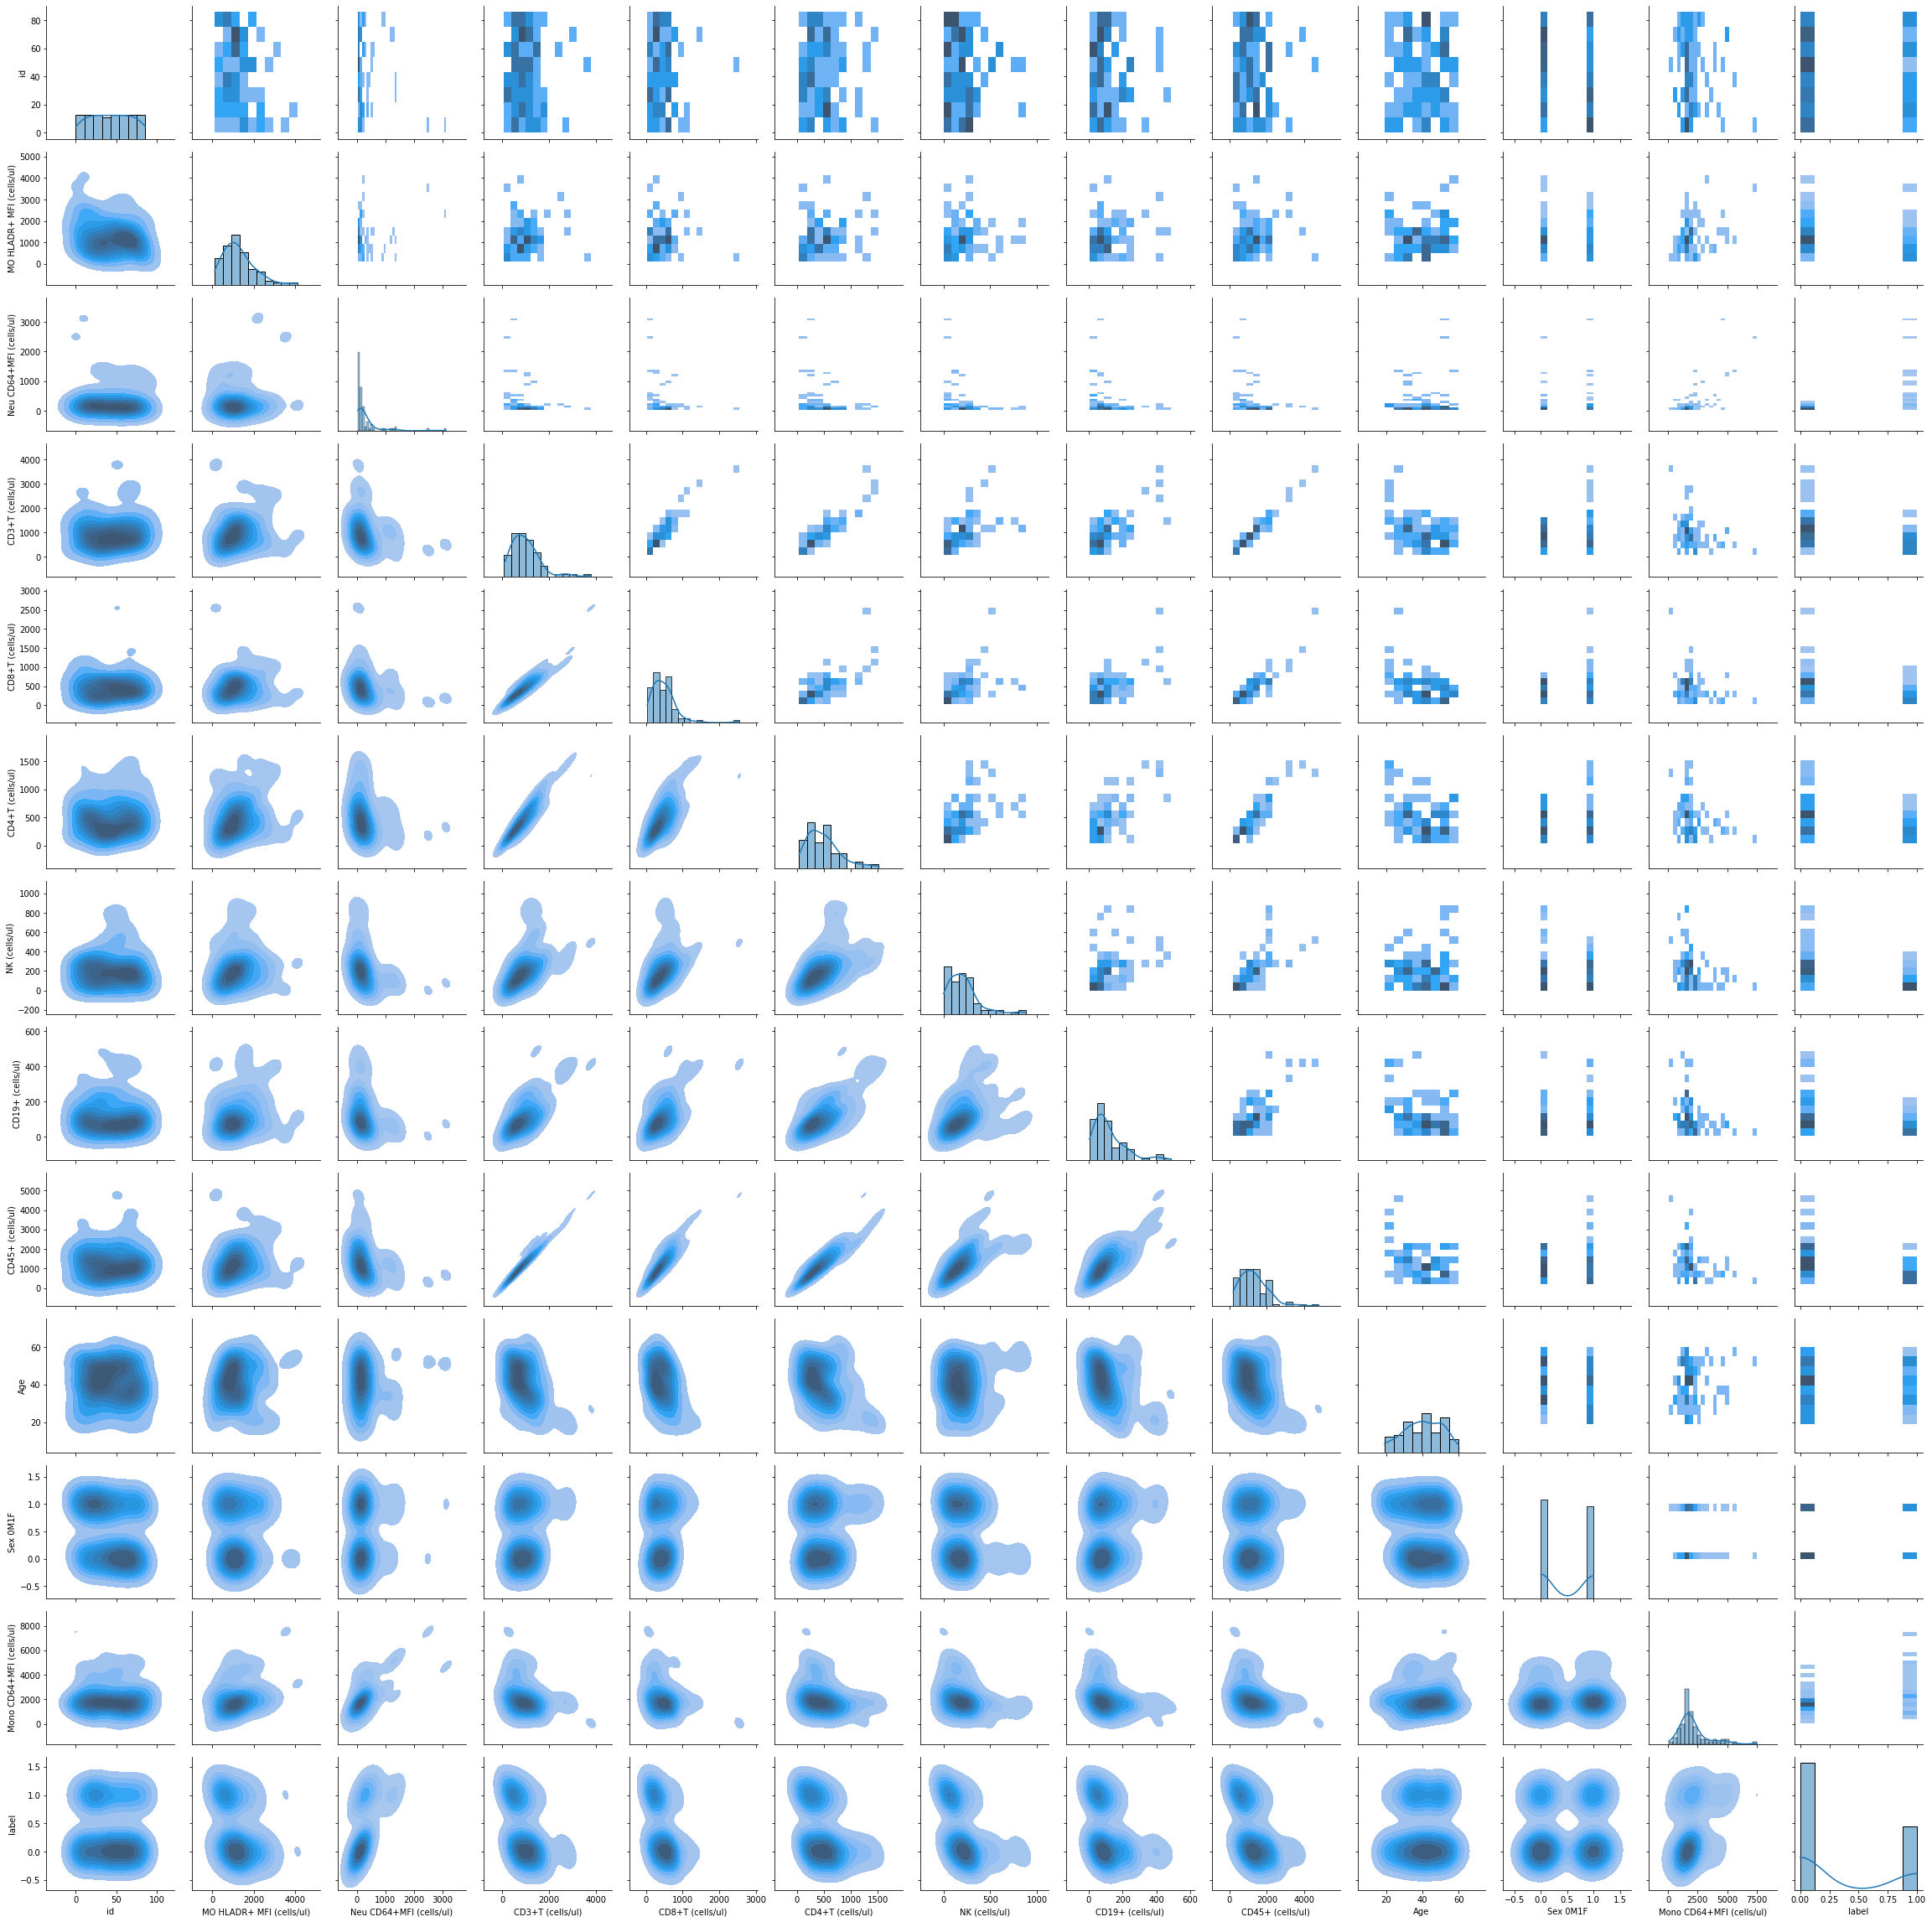

In [ ]:
import seaborn as sns
col = col_X
col.append("label")
df = df_train[col]
g = sns.PairGrid(df_train)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


In [ ]:
df_train[]

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label,AgeGroup
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1,4.45-54
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0,1.<25
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0,2.25-34
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0,5.55-64
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0,2.25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0,3.35-44
83,83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0,5.55-64
84,84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1,2.25-34
85,85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1,2.25-34


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea2e93e8-deb3-495e-8af3-6f5d6ab03efb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>